# Eenvoudig Classificatie vraagstuk

## Opdracht 5.4 vragen

In [1]:
#   a) Kies op Kaggle.com (of elders op het internet) een dataset uit die je interessant vindt en die niet gebruikt wordt
#      in het ZTDL-notebook
#      --> Link naar dataset: https://www.kaggle.com/hashyamodhia/carprices

#   b) Formuleer je eigen classificatie vraagstuk. Je mag het eenvoudig houden. Het gaat er hierom dat je een keer zelf 
#      het traject hebt doorlopen met een eigen dataset.
#      --> We willen de prijs van een auto voorspellen op basis van de leeftijd (tegenwoordige tijd - bouwjaar) en de
#          kilometerstand van een auto.

#   c) Voer een dataexploratie en visualisatie uit zodat je verstand krijgt van de dataset. Je mag hierbij de code van elders
#      copy-pasten(!) als je de bron erbij vermeld. In deze module gaat het niet om leren Phyton programmeren, maar om het
#      oplossen van een (eenvoudig) classificatie vraagstuk.
#      --> Zie de code hieronder.

#   d) Stel een neuraal netwerk op en train deze met de dataset.
#      --> Zie de code hieronder.

#   e) Test het resultaat.
#      --> Zie de code hieronder.

#   f) Wat is je conclusie?
#      --> De conclusie wordt helemaal onderin het bestand getrokken!

In [2]:
import pandas as pd
import numpy as np

# Load the carprices csv file
df = pd.read_csv("../data/carprices.csv")

# Show the first 5 datapoints of the dataset
df.head()

,Car_Model,Mileage,Sell_Price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

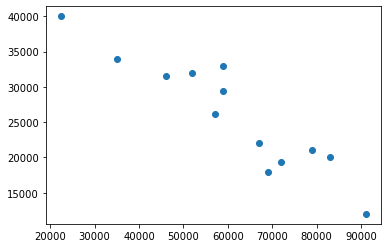

In [4]:
# Crate a scatter plot of the mileage (x-axis) and sell price (y-axis) of the cars
# There is a clear linear relationship
plt.scatter(df['Mileage'], df['Sell_Price'])

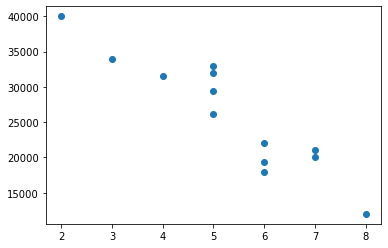

In [5]:
# Crate a scatter plot of the age (x-axis) and sell price (y-axis) of the cars
# There is a clear linear relationship
plt.scatter(df['Age(yrs)'], df['Sell_Price'])

In [6]:
# Delete the column Car_Model 
new_df = df[df.columns.difference(['Car_Model'])]
new_df

,Age(yrs),Mileage,Sell_Price
0,6,69000,18000
1,3,35000,34000
2,5,57000,26100
3,2,22500,40000
4,4,46000,31500
5,5,59000,29400
6,5,52000,32000
7,6,72000,19300
8,8,91000,12000
9,6,67000,22000


<AxesSubplot:title={'center':'Boxplot of mileage, sell price and age'}>

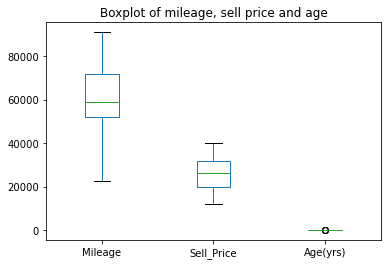

In [7]:
# Create a boxplot of the dataset
df.plot(kind='box', title='Boxplot of mileage, sell price and age')

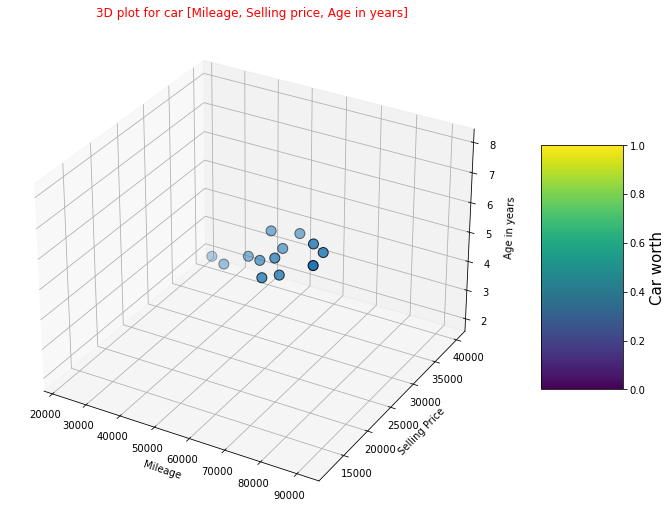

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["Mileage"],
           df["Sell_Price"],
           df["Age(yrs)"],
           linewidth=1,edgecolor ="k",s=100,cmap="hot")

ax.set_xlabel("Mileage")
ax.set_ylabel("Selling Price")
ax.set_zlabel("Age in years")

lab = fig.colorbar(plot,shrink=.5,aspect=3)
lab.set_label("Car worth",fontsize = 15)

plt.title("3D plot for car [Mileage, Selling price, Age in years]",color="red")
plt.show()

In [9]:

df_models = df['Car_Model']
df_models.unique()

array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object)

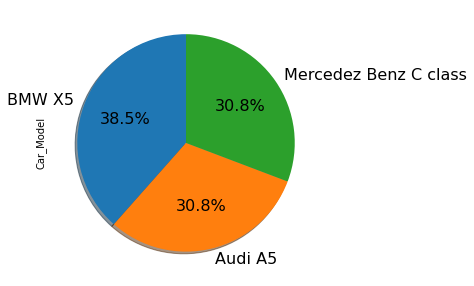

In [10]:
# Inits piecounts with 'Car_Model' values total
piecounts = df_models.value_counts()

# Plots pie chart
piecounts.plot(kind='pie',
               figsize=(5, 5),
               labels=['BMW X5', 'Audi A5','Mercedez Benz C class'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

<AxesSubplot:xlabel='count', ylabel='Car_Model'>

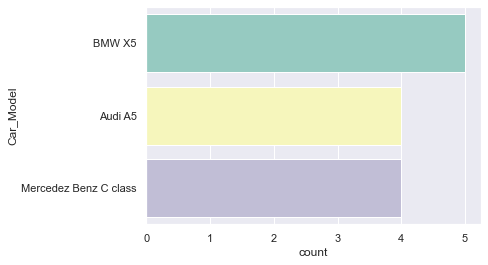

In [11]:
import seaborn as sns
# Barplot of models
sns.set_theme(style="darkgrid")
sns.countplot(y =df_models, palette="Set3")

In [12]:
# Barplot of models
arrCarModels = []

# Go through list and calculate the mean, max and min sell price per model
# Add the data to a array which will be used for data visualization.
for i in range(len(df_models.unique())):
    modelName = df_models.unique()[i]
    df_modelSellPrice = df.loc[df_models == modelName]['Sell_Price']
    meanPrice = df_modelSellPrice.mean()
    maxPrice = df_modelSellPrice.max()
    minPrice = df_modelSellPrice.min()
    arrCarModels.append([modelName, meanPrice, maxPrice, minPrice])

# Convert array into dataframe with appropriate column names
df_modelMeanPrice = pd.DataFrame(arrCarModels, columns = ["Model","Mean Price","Max Price", "Min Price"])

# print all variables from dataframe
df_modelMeanPrice.head()

,Model,Mean Price,Max Price,Min Price
0,BMW X5,29920.0,40000,18000
1,Audi A5,23175.0,32000,12000
2,Mercedez Benz C class,24000.0,33000,20000


<AxesSubplot:title={'center':'Mean sell price per car model'}, xlabel='Car model', ylabel='Mean sell price'>

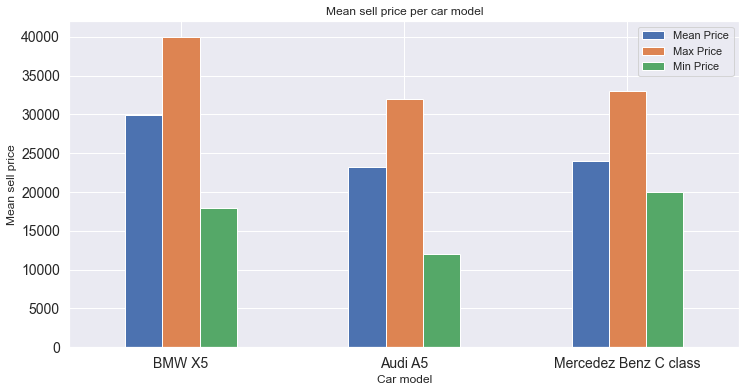

In [13]:
# Plot all data on a graph for side by side comparison.
df_modelMeanPrice.plot(kind = "bar", title = "Mean sell price per car model",
                       figsize=(12,6), legend = True, rot = 0, fontsize= 14, 
                       x='Model', xlabel = "Car model",ylabel = "Mean sell price")

In [14]:
# Create new datasets for mileage and sell price
df_mileage = new_df['Mileage']
df_price = new_df['Sell_Price']

In [15]:
# Change the type of the mileage dataset from integer to float32 and reshape it between -1 and 1.
dataset_mileage = df_mileage.values
dataset_mileage.astype('float32')
dataset_mileage = np.reshape(dataset_mileage, (-1, 1))

# Change the type of the price dataset from integer to float32 and reshape it between -1 and 1.
dataset_price = df_price.values
dataset_price.astype('float32')
dataset_price = np.reshape(dataset_price, (-1, 1))

In [16]:
# Print the mileage dataset
print("Mileage dataset array : \n",dataset_mileage, "\n")
print("Mileage dataset array shape : ", dataset_mileage.shape)

Mileage dataset array : 
 [[69000]
 [35000]
 [57000]
 [22500]
 [46000]
 [59000]
 [52000]
 [72000]
 [91000]
 [67000]
 [83000]
 [79000]
 [59000]] 

Mileage dataset array shape :  (13, 1)


In [17]:
# Print the price dataset
dataset_price
print("Price dataset array : \n",dataset_price, "\n")
print("Price dataset array shape : ", dataset_price.shape)

Price dataset array : 
 [[18000]
 [34000]
 [26100]
 [40000]
 [31500]
 [29400]
 [32000]
 [19300]
 [12000]
 [22000]
 [20000]
 [21000]
 [33000]] 

Price dataset array shape :  (13, 1)


In [18]:
# Set X equal to the mileage dataset
X = dataset_mileage

# Set y equal to the price dataset
y = dataset_price

In [19]:
# Print X, to check if it is the same with dataset_mileage
X

array([[69000],
       [35000],
       [57000],
       [22500],
       [46000],
       [59000],
       [52000],
       [72000],
       [91000],
       [67000],
       [83000],
       [79000],
       [59000]], dtype=int64)

In [20]:
# Print y, to check if it is the same with dataset_price
y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [21]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

In [22]:
# Create train and test datapoints. 20% of the dataset will be used for testing, 80% for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 1)
(3, 1)
(10, 1)
(3, 1)


In [23]:
# Print the size of the X_train (expected 80%) and X_test (expected 20%)
len(X_train), len(X_test)

(10, 3)

In [24]:
# Print X_train
X_train

array([[59000],
       [35000],
       [91000],
       [79000],
       [83000],
       [52000],
       [22500],
       [72000],
       [59000],
       [46000]], dtype=int64)

In [25]:
# Print X_test to check if there are no duplicate values 
X_test

array([[69000],
       [57000],
       [67000]], dtype=int64)

In [26]:
# Import important includes to set up a neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report

In [27]:
# The Sequential model, which is very straightforward (a simple list of layers),
# but is limited to single-input, single-output stacks of layers (as the name gives away).
##model = Sequential()

# Add dense layer 1 with 4 neurons and an 1 neuron input.
# ReLU activation function is used. Formula: f(x) = max(0, x); 
# According to the formula: The function returns 0 if it receives any negative input, but for any positive input, it returns that value back.
# In other words: It gives an output that has a range from 0 to infinity.
##model.add(Dense(4, input_shape=(1,), activation='relu'))

# Add dense layer 2 with 2 neurons. ReLU activation function is used.
##model.add(Dense(2, activation='relu'))

# Add dense layer 3 with 1 neurons. Softmax activation function is used in de output layer.
#  The softmax activation function calculates the relative probabilities. Softmax is popularly used for multiclass classification problems.
##model.add(Dense(1, activation='softmax'))

# Config the model with losses and matrics with model.compile.
# loss = 'categorical_crossentropy': Computes the crossentropy loss between the labels and predictions.
##model.compile(Adam(lr=0.05), 'categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model with model.fit().
    # epochs = number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
    # verbose = Verbosity mode 0 = silent, 1 = progress bar, 2 - one line per epoch.
##model.fit(X_train, y_train, epochs=10, verbose=1)

In [29]:
# But after hours of testing and trying to create a well functionating neural network, the result remained an accuracy of 0%. 
# We tried different layers (Dense, dropout, LSTM), different loss functions (binary_crossentropy, categorical_crossentropy,
# mean_squared_error) and different epoch amounts, but the accuracy remained 0%. We also tried to change the data, but nothing
# worked.

# Finally we found a solution: We didn't have to use the Sequential model, but the LinearRegression model. When we tried that
# model, it worked immediately.

In [30]:
# Import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
# Train the model with model.fit
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Test the dataset with the 3 testdatapoints using model.predict
predicts=model.predict(X_test)
print(predicts)

[[23793.10171932]
 [28287.39454644]
 [24542.15052384]]


In [33]:
# Compare the predictions with the actual prices
for i in range(len(model.predict(X_test))):
    print('Predicted: ', predicts[i], ' Actual: ', y_test[i])

Predicted:  [23793.10171932]  Actual:  [18000]
Predicted:  [28287.39454644]  Actual:  [26100]
Predicted:  [24542.15052384]  Actual:  [22000]


In [34]:
# Print the accuracy of the test
model_accuracy = model.score(X_test, y_test)
print("Accuracy :",model_accuracy,"\n")

Accuracy : -0.36579714645680994 



CV scores: [-78.57828545   0.26890065   0.87461565   0.90989564  -1.07626025] 

CV scores mean: -15.520226752451032 



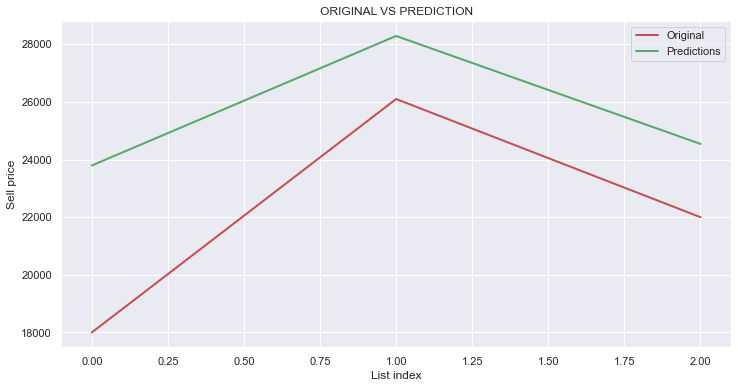

In [35]:
# From https://www.kaggle.com/cagkanbay/car-price-prediction
# Used as example for this graph

# Model doesn't consist enough data so the graph is not very useful
# for data visualization.

from sklearn.model_selection import cross_val_score

cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

#Convert predctions into dataframe to be able to plot on graph
prediction=pd.DataFrame(predicts)
# convert test data into dataframe to be able to plot on graph
original = pd.DataFrame(y_test, columns=["Original"])

# Evaluate score by cross-validation
cross_val=cross_val_score(model,X_train,y_train,cv=cv)

# Appending results to Lists 
CV.append(cross_val.mean())

# Printing results  
print("CV scores:",cross_val,"\n")
print("CV scores mean:",cross_val.mean(),"\n")

# Plot for original vs prediction
ax = original.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax = prediction[0].plot(label = "Predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINAL VS PREDICTION")
plt.xlabel("List index")
plt.ylabel("Sell price")
plt.show()